In [1]:
#библиотеки для работы
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [2]:
watches = pd.read_csv('content_test_watches.csv')
purchases = pd.read_csv('content_test_purchases.csv')

In [3]:
# Задание и правда кроличья нора. Еще и анонимизированые данные <3
# Руки так и чешутся спарсить рейтинги по просмотрам и задеанить топ100 фильмов
# Покрутил первые 3 идеи, что сразу пришли в голову

### Верхнеуровневый анализ данных

In [4]:
watches.head(3)

,device_type,element_type,element_uid,parent,psid,ts,user_uid
0,tv,episode,cfc8a82334eb814120d3cbb675e8d83e,321300929f24815ebca27cb01c5692de,96ae3ff8f927c1814159b945efe11f32,2033-12-28 19:40:01.0,c692476e176f486f5a1cf288645c65ea
1,vgc,movie,57886d1ac2d4c0236f54bf23d5430aba,NaN,93fb7365fc915eef25ec2de460c078d3,2033-12-29 18:24:48.0,18c1d7a3d2c9cf49e2467ae3fa3a0a46
2,tv,episode,030aff42d20f3a5f6a3a8ccacef19f30,239f69b92a8a260dabe0aea574054946,83b043c83beee65752a892b095045c3d,2033-12-29 19:42:16.0,a7e94a8973f207deb5e6a34c0a235fa0


In [5]:
purchases.head(3)

,user_uid,registration_time,tx_id,subscription_uid,device_type,price,offer_uid,auto_renewal,ts,actual_start_ts,actual_end_ts
0,8f53b0caf0ea4b9fb28cb0362597f20b,2032-07-23 11:09:15.0,4d9380efdaaeb92fd5c432c5e60df4b1,dd7f3f7b10fb9b502cbc5d1a9abc067b,SERVER,781.692308,NaN,True,2033-09-04 09:24:47.891632,2033-09-04 12:22:25.455251,2033-09-04 09:29:16.162414
1,b4477e3743fba69efedb713fe0ca8e90,2032-09-08 19:55:07.0,d545ae9845621fcb872a24d96af0b704,dd7f3f7b10fb9b502cbc5d1a9abc067b,SERVER,781.692308,NaN,True,2033-09-04 11:46:49.890831,2033-09-04 14:44:07.507638,2033-10-06 14:44:07.507638
2,2bf7de7062a0218df1543999f725f998,2028-02-25 21:34:27.0,d43c61dbbffa34ddae2fc267a781b55a,fffeaa1a86125af9efbb98292a9bdfb5,SERVER,935.538462,NaN,True,2033-09-04 12:48:04.938952,2033-09-04 12:48:04.938952,2033-09-04 17:14:55.450709


In [6]:
# данные у нас обо всех пользователях, которые за последние 4 месяца проявляли активность

print('первая дата покупки', purchases.loc[~purchases['ts'].isna(), 'ts'].min())
print('последняя дата покупки', purchases.loc[~purchases['ts'].isna(), 'ts'].max())
print()
print('первая дата просмотра', watches.loc[~watches['ts'].isna(), 'ts'].min())
print('последняя дата просмотра', watches.loc[~watches['ts'].isna(), 'ts'].max())
print()
print('первая дата регистрации', purchases.loc[~purchases['registration_time'].isna(), 'registration_time'].min())
print('последняя дата регистрации', purchases.loc[~purchases['registration_time'].isna(), 'registration_time'].max())

первая дата покупки 2033-09-01 00:00:16.740484
последняя дата покупки 2033-12-31 23:59:57.555

первая дата просмотра 2033-09-01 00:00:04.0
последняя дата просмотра 2033-12-31 22:45:37.0

первая дата регистрации 2026-02-05 15:06:33.397
последняя дата регистрации 2036-02-03 04:39:17.984


In [7]:
# человек зарегистрировался в 2035, а купил подписку в 2033, окей)
purchases[purchases['tx_id'] == '4d8a2a5145cd0252f8aafc516cfc1dcb']

,user_uid,registration_time,tx_id,subscription_uid,device_type,price,offer_uid,auto_renewal,ts,actual_start_ts,actual_end_ts
503635,cceca871ecd8d73561b3923df63e4b4f,2035-10-29 20:39:18.912,4d8a2a5145cd0252f8aafc516cfc1dcb,dd7f3f7b10fb9b502cbc5d1a9abc067b,TV,14.0,f685ccbddd00828748b0df64af5be1e6,False,2033-10-08 13:27:06.533792,2033-10-08 13:27:06.533792,2033-10-15 13:27:06.533792
503636,cceca871ecd8d73561b3923df63e4b4f,2035-10-29 20:39:18.912,4d8a2a5145cd0252f8aafc516cfc1dcb,dd7f3f7b10fb9b502cbc5d1a9abc067b,TV,14.0,f685ccbddd00828748b0df64af5be1e6,False,2033-10-08 13:27:06.533792,2033-10-08 13:27:06.533792,2033-10-15 13:27:06.533792
503637,cceca871ecd8d73561b3923df63e4b4f,2035-10-29 20:39:18.912,4d8a2a5145cd0252f8aafc516cfc1dcb,dd7f3f7b10fb9b502cbc5d1a9abc067b,TV,14.0,f685ccbddd00828748b0df64af5be1e6,False,2033-10-08 13:27:06.533792,2033-10-08 13:27:06.533792,2033-10-15 13:27:06.533792
503638,cceca871ecd8d73561b3923df63e4b4f,2035-10-29 20:39:18.912,4d8a2a5145cd0252f8aafc516cfc1dcb,dd7f3f7b10fb9b502cbc5d1a9abc067b,TV,14.0,f685ccbddd00828748b0df64af5be1e6,False,2033-10-08 13:27:06.533792,2033-10-08 13:27:06.533792,2033-10-15 13:27:06.533792


In [8]:
# переменная parent, по всей видимости, это название сериала, а не жанр или подобное
print(watches[watches['element_type'] == 'MOVIE']['parent'].unique().shape)
print(watches[watches['element_type'] == 'EPISODE']['parent'].unique().shape)

(1,)
(1140,)


In [9]:
# нормализуем переменные device_type и element_type
watches['device_type'] = watches['device_type'].map({
        'tv': 'TV',
        'vgc': 'VGC',
        'bd': 'BDP',
        'TBL': 'TBL',
        'MOB': 'MOB',
        'TV': 'TV',
})

watches['element_type'] = watches['element_type'].map({
        'episode': 'EPISODE',
        'movie': 'MOVIE',
        'EPISODE': 'EPISODE',
        'MOVIE': 'MOVIE',
        'tv_channel': 'tv_channel'
})



In [10]:
# время починим
purchases['registration_time'] = pd.to_datetime(purchases['registration_time'])
purchases['ts'] = pd.to_datetime(purchases['ts'])
purchases['actual_start_ts'] = pd.to_datetime(purchases['actual_start_ts'])
purchases['actual_end_ts'] = pd.to_datetime(purchases['actual_end_ts'])

watches['ts'] = pd.to_datetime(watches['ts'])

In [11]:
# зареверсинженирить прайсинг уже не так просто, очевидно, что топ акция "что-то за рубль" (за 14 сдвинутых рублей)
# и в таких кейсах это сразу видно
pd.DataFrame(purchases.loc[purchases['subscription_uid'] == 'fffeaa1a86125af9efbb98292a9bdfb5']['price'] \
             .value_counts().reset_index()).rename(columns={'index': 'price', 'price': 'count'})

,price,count
0,14.000000,78515
1,935.538462,51168
2,1243.230769,1


In [12]:
# а вот тут уже сложно, динамический прайсинг? влияния мультивалютной оплаты? 
# по этой айдишке есть как покупки, так и автопродление, значит это не покупка разного количества фильмов, а все-таки подписка.

# продавать подписку за 600-800, по акции за 14, но есть счастливчики, которые купили ее за 10к-15к
pd.DataFrame(purchases[purchases['subscription_uid'] == 'dd7f3f7b10fb9b502cbc5d1a9abc067b']['price'] \
             .value_counts()).reset_index().rename(columns={'index': 'price', 'price': 'count'}).head(20)

,price,count
0,14.000000,353566
1,781.692308,68152
2,627.846154,29321
3,827.846154,7455
4,320.153846,6377
5,15.538462,6328
6,397.076923,5140
7,474.000000,2385
8,213.692308,1007
9,1212.153846,831


In [13]:
# и последнее, что бросилось в глаза, почему у этих двух юзеров при одинаковой подписке "dd7f3f7b10fb9b502cbc5d1a9abc067b"
# у одного она продлилась на месяц, у другого нет
purchases[purchases['user_uid'].isin(['8f53b0caf0ea4b9fb28cb0362597f20b', 'b4477e3743fba69efedb713fe0ca8e90'])] \
    .drop(columns=['tx_id', 'subscription_uid'])

,user_uid,registration_time,device_type,price,offer_uid,auto_renewal,ts,actual_start_ts,actual_end_ts
0,8f53b0caf0ea4b9fb28cb0362597f20b,2032-07-23 11:09:15,SERVER,781.692308,NaN,True,2033-09-04 09:24:47.891632,2033-09-04 12:22:25.455251,2033-09-04 09:29:16.162414
1,b4477e3743fba69efedb713fe0ca8e90,2032-09-08 19:55:07,SERVER,781.692308,NaN,True,2033-09-04 11:46:49.890831,2033-09-04 14:44:07.507638,2033-10-06 14:44:07.507638


## Идея 1 
Посмотрим акция на какие сериалы затягивает пользователей и они продлевают подписку, а после каких сериалов пользователи разочаровываются и подписку не продлевают

Буду исходить из логики, что самый просматриваемый пользователем сериал за время тестовой подписки это тот, ради которого человек подписался

In [14]:
# сортировка для будущих группировок
purchases = purchases.sort_values(['registration_time', 'ts'])

# возьмем только свежих клиентов, для чистоты анализа
new_users = purchases[purchases['registration_time'] >= '2033-09-01']['user_uid'].unique()
# и тех, кто посмотрел хотя бы одну серию сериала
series_users = watches[watches['element_type'] == 'EPISODE']['user_uid'].unique()

work_users = set(new_users) & set(series_users)

In [15]:
# возьмем первую покупку этих пользователей
first_sub = purchases[purchases['user_uid'].isin(work_users)].groupby('user_uid').head(1)
# и отберем только тех, кто взял по скидке 7-дневную, как я понимаю сериальную подписку
first_sub = first_sub[(first_sub['price'] == 14) & 
                     ((first_sub['actual_end_ts'] - first_sub['actual_start_ts']) < pd.Timedelta('8 days 00:00:00')) &
                     ((first_sub['actual_end_ts'] - first_sub['actual_start_ts']) > pd.Timedelta('5 days 00:00:00'))]

work_users = first_sub['user_uid'].unique()

# оставим только серии сериалов у отобранных юзеров
watches_series = watches[(watches['element_type'] == 'EPISODE') &
                       (watches['user_uid'].isin(work_users))]

In [16]:
# прокиним в просмотры время подписки, чтобы отобрать именно то, что смотрел человек в бесплатный период
watches_series = watches_series.merge(first_sub[['user_uid', 'actual_start_ts', 'actual_end_ts', 'subscription_uid']],
                                        on='user_uid', how='left')
watches_series = watches_series[(watches_series['ts'] >= watches_series['actual_start_ts']) &
                                (watches_series['ts'] <= watches_series['actual_end_ts'])]
watches_series = watches_series.rename(columns={'actual_start_ts': 'start_first_sub',
                               'actual_end_ts': 'end_first_sub',
                               'subscription_uid': 'first_type_sub'})

# обновим наш массив с айдишками пользователей
work_users = watches_series['user_uid'].unique()

In [17]:
# получим таблицу юзеров и сериалов ради которых они взяли подписку по нашей теории, а также привяжем данные о первой подписке
users_series = watches_series.groupby('user_uid', as_index=False)[['parent', 
                                                                   'start_first_sub',
                                                                   'end_first_sub',
                                                                   'first_type_sub']].agg(pd.Series.mode)

In [18]:
# найдем пользователей, которые в течение 14 дней после начала бесплатной подписки, продлили ее уже за нормальную стоимость

# прокиним данные о первой подписке
second_sub = purchases.merge(users_series, on='user_uid', how='left')

# 150 взял как минимальную не однорублевую стоимость подписки
second_sub = second_sub[(second_sub['subscription_uid'] == second_sub['first_type_sub']) &
                        (second_sub['ts'] >= second_sub['start_first_sub']) &
                        (second_sub['ts'] <= second_sub['start_first_sub'] + pd.Timedelta('14 days 00:00:00')) &
                        (second_sub['price'] >= 150)]

In [19]:
# прокинем признак второй оплаты
users_series['second_purchase'] = 0

users_series.loc[users_series['user_uid'].isin(second_sub['user_uid'].unique()), 'second_purchase'] = 1

In [20]:
# подведем итоги
# условие с лямбдой отсевает несколько пользователей, у которых было бимодальное распределение самых популярных сериалов

# топ5 сериалов, после которых люди оформляют платную подписку, чтобы продолжить просмотр
best_series = users_series[(users_series['second_purchase'] == 1) & 
             (users_series['parent'].apply(lambda x: type(x) == str))]['parent'].value_counts()
best_series = pd.DataFrame(best_series).reset_index().rename(columns={'index': 'title', 'parent': 'count'})
best_series[:5]

,title,count
0,321300929f24815ebca27cb01c5692de,1463
1,510738427335e7b35927c1f3a01d3ed3,135
2,e7a47a2bf420c59e189b915d3217a80f,104
3,085de2b9bf527f1c3478e4de7fe02233,89
4,37322a8b284ce2cdbdfd551ea8ad33be,41


In [21]:
# топ5 сериалов, после которых люди не стали оформлять платную подписку, чтобы продолжить просмотр
worst_series = users_series[(users_series['second_purchase'] == 0) & 
             (users_series['parent'].apply(lambda x: type(x) == str))]['parent'].value_counts()
worst_series = pd.DataFrame(worst_series).reset_index().rename(columns={'index': 'title', 'parent': 'count'})
worst_series[:5]

,title,count
0,321300929f24815ebca27cb01c5692de,6776
1,7ec2411fd8da4a7eefaf6e2c7614d70a,317
2,085de2b9bf527f1c3478e4de7fe02233,288
3,510738427335e7b35927c1f3a01d3ed3,263
4,e7a47a2bf420c59e189b915d3217a80f,220


In [22]:
# сравнение количественных значений нам ничего не дало, так как популярность тех или иных тайтлов выводит их в топ как
# в лучших для переподписки, так и для отказа от нее

# сравним тогда относительные показатели

In [23]:
# построим сводную таблицу хороших и плохих тайтлов, посчитаем общее количество и относитиельные показатели
overall_series_stat = best_series.merge(worst_series, on=['title'], how='inner') \
                        .rename(columns={'count_x': 'purchase', 'count_y': 'drop'})

overall_series_stat['total_count'] = overall_series_stat['purchase'] + overall_series_stat['drop']
overall_series_stat['ratio_purchase'] = overall_series_stat['purchase'] / overall_series_stat['total_count']
overall_series_stat['ratio_drop'] = overall_series_stat['drop'] / overall_series_stat['total_count']

In [24]:
# будем рассматривать только те сериалы, о которых есть как минимум 20 наблюдений

# топ5 сериалов, с самым высоким показателем переподписки
overall_series_stat[overall_series_stat['total_count'] >= 20].sort_values('ratio_purchase', ascending=False).head(5)

,title,purchase,drop,total_count,ratio_purchase,ratio_drop
9,69f4b6d439e37b25998eb515b4a62df7,26,40,66,0.393939,0.606061
39,3da3b804516fa47fffd8242aadb4073f,7,13,20,0.350000,0.650000
1,510738427335e7b35927c1f3a01d3ed3,135,263,398,0.339196,0.660804
28,7cfcad1d9e1aa18e8f41038266515c34,9,19,28,0.321429,0.678571
2,e7a47a2bf420c59e189b915d3217a80f,104,220,324,0.320988,0.679012


In [25]:
# топ5 сериалов, с самым низким показателем переподписки
overall_series_stat[overall_series_stat['total_count'] >= 20].sort_values('ratio_drop', ascending=False).head(5)

,title,purchase,drop,total_count,ratio_purchase,ratio_drop
159,88d729c740da721c23da0e34688d0bc5,1,47,48,0.020833,0.979167
112,12c0adb7a19d6ec725ed9b1f9afd361c,2,34,36,0.055556,0.944444
73,0033c8aa87e049424be5c3ed0acd7ed5,3,51,54,0.055556,0.944444
121,35582b4f4ea1ab659e283ec0532d503d,2,30,32,0.062500,0.937500
114,e1b2de6e9d2d38270346397ab70759e2,2,26,28,0.071429,0.928571


### Вывод
Используя полученные данные мы можем сделать вывод, какие сериалы в первую очередь стоит рекомендовать пользователям приобрести по скидке, так как будем ожидать, что с высокой вероятностью, они заходят подписку продлить уже за полную стоимость досмотреть сериал

А какие сериалы, только разочаруют пользователя, и данную подписку он не станет продлевать

## Идея 2
Посмотрим взаимосвязь количества просмотров за первые 3 недели месячной подписки и вероятности того, что пользователь продлит подписку. Если обнаружится резкая просадка при малом количестве просмотров, то мы можем активнее рассылать письма и пуши в таких пользователей, с желанием удержать в подписчиках, не боясь переборщить, ибо он и так от нас потенциально уйдет.

Буду смотреть первые 3 недели, чтобы оставался лаг вернуть клиента и подсадить на сериал в последние выходные месяца.

In [26]:
# отберем пользователей, которые купили месячную подписку, руками, а не автоматически
# возьмем только сентябрь и октябрь, чтобы увидеть что происходит после конца подписки
# не скидочную подписку, и первую из имеющихся по пользователю
month_sub = purchases[((purchases['actual_end_ts'] - purchases['actual_start_ts']) > pd.Timedelta('26 days 00:00:00')) &
                      ((purchases['actual_end_ts'] - purchases['actual_start_ts']) < pd.Timedelta('35 days 00:00:00')) &
                       (purchases['ts'] <= '2033-11-01') & 
                       (purchases['price'] > 150) &
                       (purchases['auto_renewal'] != True)] \
            .groupby('user_uid').head(1)

In [27]:
# посчитаем просмотры в первые три недели подписки
month_sub_watches = watches.merge(month_sub[['user_uid', 'actual_start_ts', 'actual_end_ts']], on='user_uid', how='left')
month_sub_watches = month_sub_watches[(month_sub_watches['actual_start_ts'].notna()) &
                                      (month_sub_watches['ts'] >= month_sub_watches['actual_start_ts']) &
                                      (month_sub_watches['ts'] <= month_sub_watches['actual_end_ts'] - pd.Timedelta('8 days 00:00:00'))]

user_stats = month_sub_watches.groupby('user_uid', as_index=False)['element_uid'].count()

In [28]:
# вытащим данные о наличие второй покупки перед окончанием первой или в течение 2 недель после
second_sub = purchases.merge(month_sub[['user_uid', 'actual_start_ts', 'actual_end_ts']] \
                      .rename(columns={'actual_start_ts': 'first_sub_start', 'actual_end_ts': 'first_sub_end'}), 
                             on='user_uid', how='left')

second_sub = second_sub[(second_sub['price'] > 150) &
           (second_sub['ts'] > second_sub['first_sub_start'] + pd.Timedelta('21 days 00:00:00')) &
           (second_sub['ts'] < second_sub['actual_end_ts'] + pd.Timedelta('14 days 00:00:00'))]

In [29]:
# прокинем признак наличия второй оплаты
user_stats['second_purchases'] = 0
user_stats.loc[user_stats['user_uid'].isin(second_sub['user_uid'].unique()), 'second_purchases'] = 1

user_stats = user_stats.sort_values('element_uid').reset_index(drop=True)

In [30]:
# перегрупируем данные, посчитаем количество пользователей, которые посмотрели n единииц контента
count_users = pd.DataFrame(user_stats['element_uid'].value_counts()) \
                    .reset_index().rename(columns={'index': 'views', 'element_uid': 'count_users'}) \
                    .sort_values('views')
# посчитаем количество пользователей, которые посмотрели n единииц контента и продлили подписку
second_sub_users = pd.DataFrame(user_stats[user_stats['second_purchases'] == 1]['element_uid'].value_counts()) \
                    .reset_index().rename(columns={'index': 'views', 'element_uid': 'count_users_subed'}) \
                    .sort_values('views')

# сведем финальную таблицу и посчитаем вероятность, что пользователь останется в сервисе
final_stat = count_users.merge(second_sub_users, on='views', how='left').fillna(0)
final_stat['ratio_second_purchases'] = final_stat['count_users_subed'] / final_stat['count_users']

<AxesSubplot:xlabel='views', ylabel='ratio_second_purchases'>

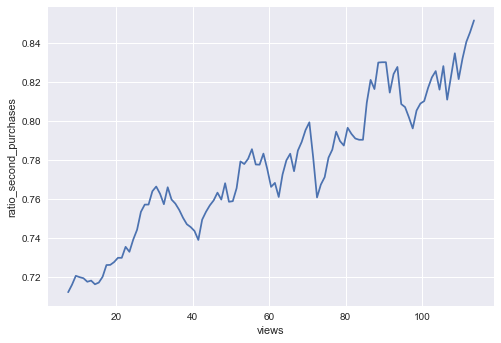

In [31]:
# построим график
sns.lineplot(x="views", y="ratio_second_purchases", data=final_stat[:120].rolling(14).mean())

### Вывод
Мы увидели ожидаемую картину, что чем больше человек смотрит контента, тем с большей вероятностью он переподпишется.

Но я ожидал увидеть сильное снижение вероятности повторной подписки у людей с малым количеством просмотров, чтобы иметь возможность выделить это как целевую группу для рассылок. 

Но видимо признак первой покупки уже очень сильно влияет на то, что пользователь не бросит сервис через месяц, либо системы подписки и платжей настроенны так, что люди совсем забывшие про сервис, забывают от него и отписаться, и оплата проходит автоматически

## Идея 3
Хочу посмотреть как влияет клоссплатформеность пользователя на его лояльность и денежные метрики, чтобы понять стоит ли стимулировать пользователей использовать дополнительные платформы для просмотра.

In [32]:
# возьме для анализа только пользователей, который пользуются сервисом больше полугода,
# и значит уже четко встроили okko в свою жизнь
users_ids = purchases[purchases['registration_time'] < '2033-03-01']['user_uid'].unique()

In [33]:
# подвыборки старых юзеров
watches_old_users = watches[watches['user_uid'].isin(users_ids)].copy()
purchases_old_users = purchases[purchases['user_uid'].isin(users_ids)].copy()

In [34]:
# количество просмотров по платформам
watches_old_users['device_type'].value_counts()

TV     5059342
VGC     468763
MOB     350391
TBL     143101
BDP      16071
Name: device_type, dtype: int64

In [35]:
# посмотрим распределение, сколько пользователей используют 1/2/3/4/5 платформ для просмотра контента
watches_old_users.drop_duplicates(['device_type', 'user_uid']) \
            .groupby('user_uid', as_index=False)['device_type'].count() \
            ['device_type'].value_counts()

# для анализа будем брать 3 группы, одна платформа, 2 и 3+

1    132617
2     11150
3      2471
4       165
Name: device_type, dtype: int64

In [36]:
# создадим датафрейм вида: пользователь + количество платформ
user_stat = watches_old_users.drop_duplicates(['device_type', 'user_uid']) \
                 .groupby('user_uid', as_index=False)['device_type'].count().rename(columns={'device_type': 'device_count'})

user_stat_unique_id = user_stat['user_uid'].unique()

In [37]:
# посчитаем базовые метрики просмотров и покупок

# количество просмотров
total_views = watches_old_users.groupby('user_uid', as_index=False)['element_uid'] \
        .count().rename(columns={'element_uid': 'total_views'})
# количество уникальных просмотров
total_views_unique = watches_old_users.drop_duplicates(['element_uid', 'user_uid']) \
        .groupby('user_uid', as_index=False)['element_uid'] \
        .count().rename(columns={'element_uid': 'total_views_unique'})
# количество дней просмотра
watches_old_users['ts'] = watches_old_users['ts'].dt.date.values
unique_day_using = watches_old_users.drop_duplicates(['ts', 'user_uid']) \
        .groupby('user_uid', as_index=False)['ts'] \
        .count().rename(columns={'ts': 'unique_day_using'})

# общий доход
total_income = purchases.groupby('user_uid', as_index=False)['price'] \
        .sum().rename(columns={'price': 'total_income'})
# средний чек
average_check = purchases.groupby('user_uid', as_index=False)['price'] \
        .mean().rename(columns={'price': 'average_check'})
# количество покупок
count_purchases = purchases.groupby('user_uid', as_index=False)['price'] \
        .count().rename(columns={'price': 'count_purchases'})

In [38]:
# перемерджим все
user_stat = user_stat.merge(total_views, how='left', on='user_uid')
user_stat = user_stat.merge(total_views_unique, how='left', on='user_uid')
user_stat = user_stat.merge(unique_day_using, how='left', on='user_uid')
user_stat = user_stat.merge(total_income, how='left', on='user_uid')
user_stat = user_stat.merge(average_check, how='left', on='user_uid')
user_stat = user_stat.merge(count_purchases, how='left', on='user_uid')

In [39]:
# объединим признак 3 и 4 девайсов
user_stat.loc[user_stat['device_count'] == 4, 'device_count'] = '3+'
user_stat.loc[user_stat['device_count'] == 3, 'device_count'] = '3+'

In [40]:
# финальные резушльтаты
round(user_stat.groupby('device_count').mean(), 2)

,total_views,total_views_unique,unique_day_using,total_income,average_check,count_purchases
device_count,,,,,,
1,30.69,19.06,6.96,639.36,148.92,2.50
2,124.92,70.15,24.48,2200.99,366.53,5.76
3+,218.22,120.43,39.21,3412.69,461.17,7.58


### Вывод
Мы можем сделать вывод, что чем на большем количестве устройст пользователь смотрит контент okko, тем в разы больше он приносит нам прибыли.

Но чтобы подсветить реальные пути эффективного маркетинга, нужно проваливаться глубже в подтипы кросплатформености.

То есть надо понимать, какой именно переход приносит больше денег:

-установка приложения ребенку? на общий ТВ?

-если пользователь действительно один у одного аккаунта, то перевод его с приставки также в мобильное приложение?

И найдя такие взаимосвязи мы можем проводить выгодные промо, призывая конкретные группы пользователей перейти на конкретные дополнительные девайсы

Из имеющихся данных более тонкие выводы построить тяжело, но и цель была подсветить наличие/отсутствие тренда